In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm


In [9]:
U = np.load("./output/lowdin/U.npy")
i = np.load("./output/lowdin/index_active_region.npy")
U.shape

(22, 22)

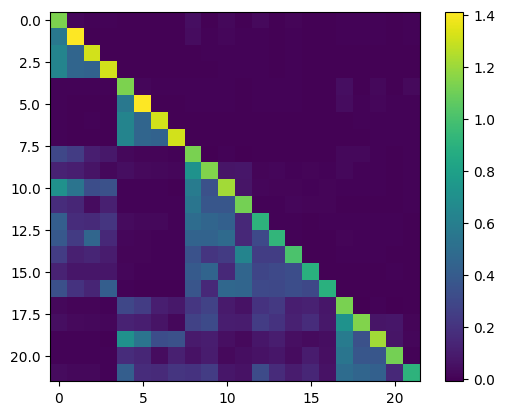

In [10]:
plt.imshow(U)
plt.colorbar()

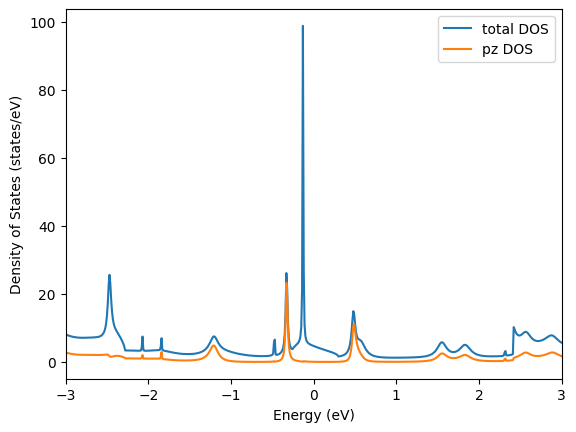

In [6]:
tdos = np.load("output/lowdin/dft/Evdos.npy")
pdos = np.load("output/lowdin/dft/Evdos_pz.npy")
plt.plot(tdos[0, :], tdos[1, :], label="total DOS")
plt.plot(pdos[0, :], pdos[1, :], label="pz DOS")
# plt.yscale("log")
plt.xlabel("Energy (eV)")
plt.ylabel("Density of States (states/eV)")
plt.xlim(-3, 3)
plt.legend()

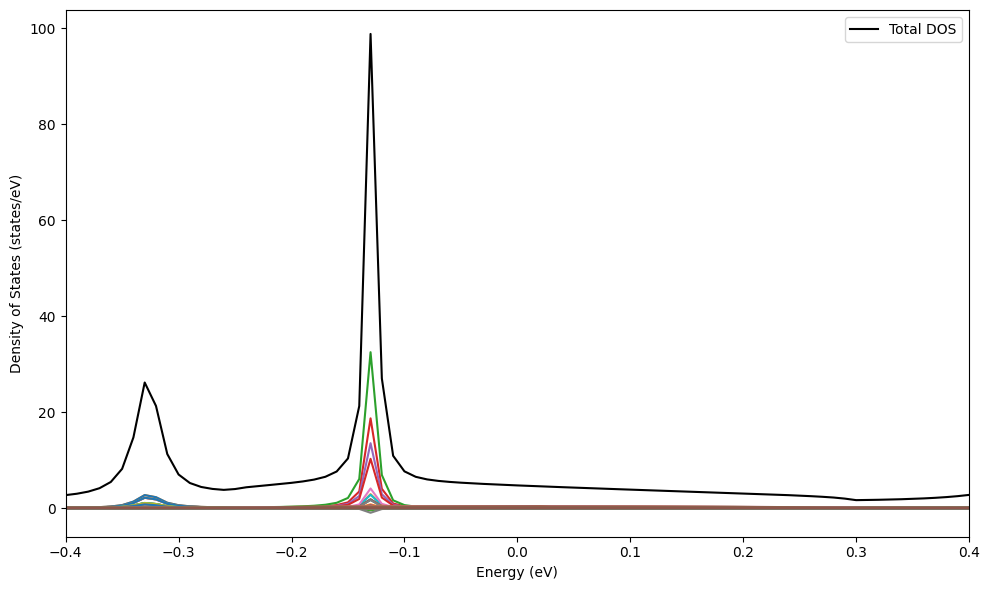

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# === Load total DOS ===
tdos_data = np.load("output/lowdin/dft/Evdos.npy", allow_pickle=True)
tdos_energies, tdos = tdos_data

# === Load projected DOS ===
pdos_data = np.load("output/lowdin/dft/Evpdos.npz")
pdos_energies = pdos_data["energies"]
pdos_matrix = pdos_data["pdos"]  # shape: (n_energies, n_orbitals)


# === Plot ===
plt.figure(figsize=(10, 6))

# Plot total DOS
plt.plot(tdos_energies, tdos, label="Total DOS", color="black", linewidth=1.5)

plt.plot(pdos_energies, pdos_matrix[:, :])#, label=f"Orbital")

# === Labels and formatting ===
plt.xlabel("Energy (eV)")
plt.ylabel("Density of States (states/eV)")
plt.xlim(-0.4, 0.4)
plt.legend()
plt.tight_layout()
plt.savefig("output/lowdin/dft/individual_pdos.png", dpi=300)
plt.show()


In [4]:
# === Define energy range of interest ===
emin = -0.2
emax = 0.0

# Find indices within the target energy window
window_mask = (tdos_energies >= emin) & (tdos_energies <= emax)

# Extract the energies and DOS values in the window
tdos_window = tdos[window_mask]
energies_window = tdos_energies[window_mask]

# Find the index of the peak in this energy window
peak_idx_within_window = np.argmax(tdos_window)

# Convert to index in the full array
peak_energy = energies_window[peak_idx_within_window]
peak_global_idx = np.where(tdos_energies == peak_energy)[0][0]

# Extract PDOS at the peak energy index
pdos_at_peak = pdos_matrix[peak_global_idx, :]

# Total DOS at the peak (for normalization)
total_at_peak = tdos[peak_global_idx]

# Compute percentage contribution
percent_contributions = 100 * pdos_at_peak / total_at_peak

# Get top 10 contributing orbital indices
top_indices = np.argsort(percent_contributions)[::-1][:10]
top_percentages = percent_contributions[top_indices]

# Print results
print("Top 10 orbital contributions at peak energy {:.3f} eV:".format(peak_energy))
for i, (idx, pct) in enumerate(zip(top_indices, top_percentages), 1):
    print(f"{i}. Orbital {idx}: {pct:.2f}%")


Top 10 orbital contributions at peak energy -0.130 eV:
1. Orbital 12: 32.87%
2. Orbital 3: 18.92%
3. Orbital 4: 13.68%
4. Orbital 13: 10.38%
5. Orbital 26: 4.12%
6. Orbital 1: 2.92%
7. Orbital 9: 2.80%
8. Orbital 35: 1.84%
9. Orbital 0: 1.81%
10. Orbital 27: 1.75%


Based on the above numbers, the DOS peak at ~-0.13 eV, which is not described by the C 2 pz in the bridge, is due to the C pz in the (left?) lead.  